# 가설검정의 주의점
**[수업 목표]**
- 가설검정의 다양한 주의점에 대해 이해한다
- 이러한 주의점들을 참고하여 가설검정을 진행할 수 있다

## 6.1 재현 가능성
우연히 결과가 나오는 것이 아닌, 항상 일관된 결과가 나오는지 확인해야 합니다!

## 6.2 p-해킹
인위적으로 p-값을 낮추지 않을 수 있도록 조심해야 합니다!

## 6.3 선택적 보고
유의미한 결과만을 보고하고, 유의미하지 않은 결과는 보고하지 않는 행위

## 6.4 자료수집 중단 시점 결정
원하는 결과가 나올 때 까지 자료를 수집하는 것을 조심!
데이터 수집을 시작하기 전에 언제 수집을 중단할지 명확하게 결정하지 않으면, 원하는 결과가 나올 때까지 데이터를 계속 수집할 수 있음. 이는 결과의 신뢰성을 떨어뜨림.
### 결과를 이미 정해놓고 그에 맞추기 위해 자료수집을 하고자 할 때
50명의 데이터를 수집하기로 했으나, 원하는 결과가 나오지 않자 100명까지 추가로 수집

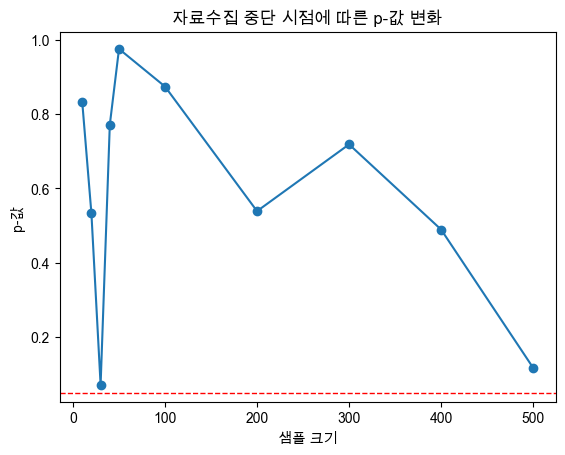

In [3]:
# 데이터 수집 예시
import numpy as np
import pltKorean_mac
import matplotlib.pyplot as plt
import scipy.stats as stats
pltKorean_mac.set_font_manager()

np.random.seed(42)
data = np.random.normal(0, 1, 1000)
sample_sizes = [10, 20, 30, 40, 50, 100, 200, 300, 400, 500]
p_values = []

for size in sample_sizes:
    sample = np.random.choice(data, size)
    _, p_value = stats.ttest_1samp(sample, 0)
    p_values.append(p_value)

# p-값 시각화
plt.plot(sample_sizes, p_values, marker='o')
plt.axhline(y=0.05, color='red', linestyle='dashed', linewidth=1)
plt.title('자료수집 중단 시점에 따른 p-값 변화')
plt.xlabel('샘플 크기')
plt.ylabel('p-값')
plt.show()

## 6.5 데이터 탐색과 검증 분리
데이터 탐색을 통해 가설을 설정하고, 이를 검증하기 위해 별도의 독립된 데이터셋을 사용하는 것, 과적합을 방지하고 결과의 신뢰성을 높임
### 검증하기 위한 데이터가 따로 필요할 
- 데이터셋을 탐색용(training)과 검증용(test)으로 분리하여 사용

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 데이터 생성
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# 데이터 분할 (탐색용 80%, 검증용 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 탐색용 데이터로 예측
y_train_pred = model.predict(X_train)

# 검증용 데이터로 예측
y_test_pred = model.predict(X_test)

# 탐색용 데이터 평가
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
print(f"탐색용 데이터 - MSE: {train_mse}, R2: {train_r2}")

# 검증용 데이터 평가
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
print(f"검증용 데이터 - MSE: {test_mse}, R2: {test_r2}")

탐색용 데이터 - MSE: 0.8476788564209705, R2: 0.7582381034538057
검증용 데이터 - MSE: 0.6536995137170016, R2: 0.8072059636181393
